# Data Loading

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import missingno as msno
from datetime import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../data_local'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data_local\DA_Data.csv
../data_local\items.csv
../data_local\item_categories.csv
../data_local\sales_train.csv
../data_local\sample_submission.csv
../data_local\shops.csv
../data_local\test.csv


In [3]:
train2 = pd.read_csv('../data_local/sales_train.csv', index_col='date', parse_dates= True)
train = pd.read_csv('../data_local/sales_train.csv')
sample_submission = pd.read_csv('../data_local/sample_submission.csv')
test = pd.read_csv('../data_local/test.csv')
items = pd.read_csv('../data_local/items.csv')
item_categories = pd.read_csv('../data_local/item_categories.csv')
shops = pd.read_csv('../data_local/shops.csv')
sales_merged_df = pd.read_csv('../data_local/DA_Data.csv')

In [5]:
sales_merged_df

,date,date_block_num,shop_id,item_id,item_id.1,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,2015-10-09,33,25,7460,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,2015-10-14,33,25,7459,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,2015-10-22,33,25,7440,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


# Data Decomposition

In [6]:
sales_merged_df
sales_item_20_df = sales_merged_df.loc[sales_merged_df['item_category_id']==20]
sales_item_20_df
sales_item_20_df_clean = sales_item_20_df.drop(sales_item_20_df[sales_item_20_df['item_cnt_day'] < 0].index)
sales_item_20_df_clean2 = sales_item_20_df_clean.drop(sales_item_20_df_clean[sales_item_20_df_clean['item_price'] < 0].index)
sales_item_20_df_clean2

,date,date_block_num,shop_id,item_id,item_id.1,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
1029535,2013-11-22,10,28,2331,2331,2799.0,1.0,"Call of Duty: Ghosts [PS4, русская версия]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
1029536,2013-11-23,10,28,2331,2331,2799.0,1.0,"Call of Duty: Ghosts [PS4, русская версия]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
1029537,2013-11-29,10,28,2331,2331,2799.0,6.0,"Call of Duty: Ghosts [PS4, русская версия]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
1029625,2013-11-29,10,28,1514,1514,2999.0,7.0,Assassin's Creed IV. Черный флаг. Специальное ...,20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
1030933,2013-11-29,10,28,3333,3333,2599.0,11.0,"FIFA 14 [PS4, русская документация]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
...,...,...,...,...,...,...,...,...,...,...,...
2935783,2015-10-09,33,25,7172,7172,1499.0,1.0,"UFC [PS4, английская версия]",20,Игры - PS4,"Москва ТРК ""Атриум"""
2935784,2015-10-21,33,25,7172,7172,1499.0,1.0,"UFC [PS4, английская версия]",20,Игры - PS4,"Москва ТРК ""Атриум"""
2935785,2015-10-30,33,25,7172,7172,1499.0,1.0,"UFC [PS4, английская версия]",20,Игры - PS4,"Москва ТРК ""Атриум"""
2935786,2015-10-31,33,25,7172,7172,1499.0,1.0,"UFC [PS4, английская версия]",20,Игры - PS4,"Москва ТРК ""Атриум"""


In [7]:
sales_item_20_df_clean2['date'] = pd.to_datetime(sales_item_20_df_clean2['date'])
sales_item_20_df_clean2 = sales_item_20_df_clean2.set_index('date')
sales_item_20_df_clean2

,date_block_num,shop_id,item_id,item_id.1,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
date,,,,,,,,,,
2013-11-22,10,28,2331,2331,2799.0,1.0,"Call of Duty: Ghosts [PS4, русская версия]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
2013-11-23,10,28,2331,2331,2799.0,1.0,"Call of Duty: Ghosts [PS4, русская версия]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
2013-11-29,10,28,2331,2331,2799.0,6.0,"Call of Duty: Ghosts [PS4, русская версия]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
2013-11-29,10,28,1514,1514,2999.0,7.0,Assassin's Creed IV. Черный флаг. Специальное ...,20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
2013-11-29,10,28,3333,3333,2599.0,11.0,"FIFA 14 [PS4, русская документация]",20,Игры - PS4,"Москва ТЦ ""МЕГА Теплый Стан"" II"
...,...,...,...,...,...,...,...,...,...,...
2015-10-09,33,25,7172,7172,1499.0,1.0,"UFC [PS4, английская версия]",20,Игры - PS4,"Москва ТРК ""Атриум"""
2015-10-21,33,25,7172,7172,1499.0,1.0,"UFC [PS4, английская версия]",20,Игры - PS4,"Москва ТРК ""Атриум"""
2015-10-30,33,25,7172,7172,1499.0,1.0,"UFC [PS4, английская версия]",20,Игры - PS4,"Москва ТРК ""Атриум"""


In [72]:
sales_item_20_df_sort = sales_item_20_df_clean2.drop(['shop_id','item_id','item_price','date_block_num','shop_name','item_id.1','item_name','item_category_id','item_category_name'],axis=1)
sales_item_20_df_sort

# Select the proper time period for weekly aggreagation
df = sales_item_20_df_sort['2013-01-01':'2015-11-01'].resample('W').sum()

<IPython.core.display.Javascript object>


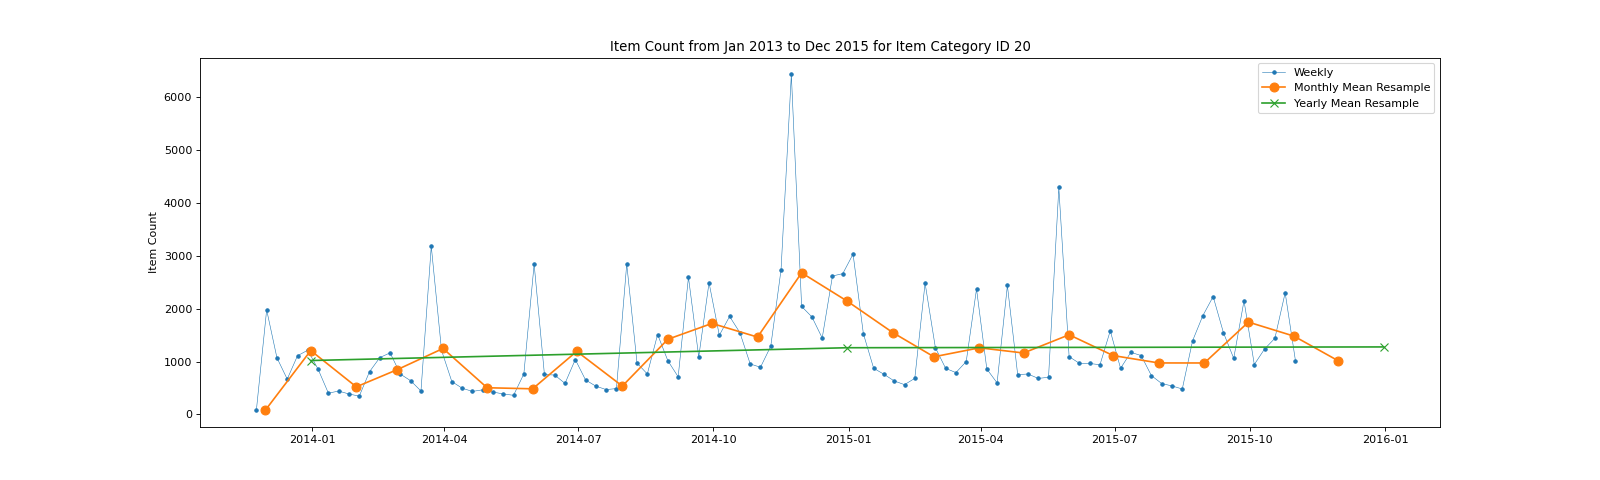

In [73]:
y = df['item_cnt_day']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(y.resample('Y').mean(),marker='x', markersize=8, linestyle='-', label='Yearly Mean Resample')
ax.set_ylabel('Item Count')
ax.set_title('Item Count from Jan 2013 to Dec 2015 for Item Category ID 20')
ax.legend();

In [40]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
#     decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    decomposition = sm.tsa.seasonal_decompose(y,model='additive', freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<IPython.core.display.Javascript object>


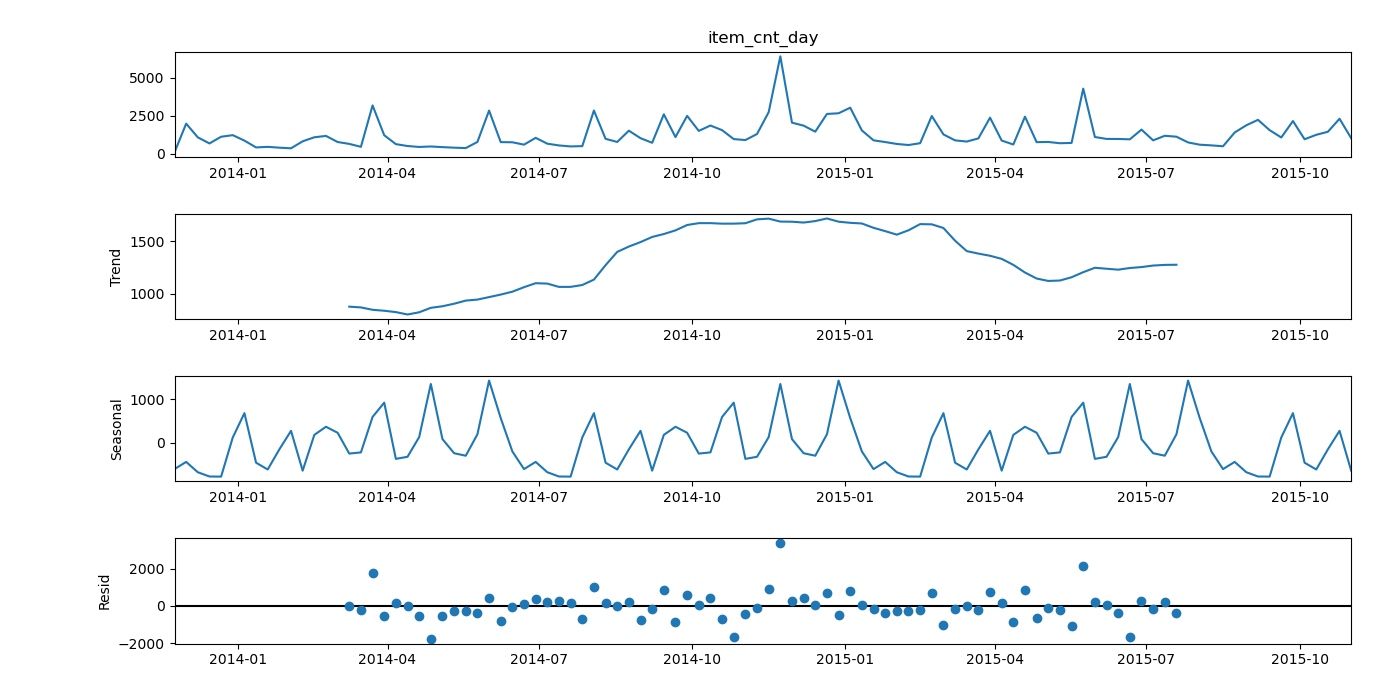

In [41]:
seasonal_decompose(y)

From observation from the four component, we can see the sales trend decreased from 2013 to 2015. 
The seasonal peak is 2014 & 2015 January


Seasonality : A time series is said to be seasonal when it is affected by seasonal factors (hour of day, week, month, year, etc.). Seasonality can be observed with nice cyclical patterns of fixed frequency.

Data is said to be seasonal when it changes exactly in the same way over a different time period. In this example, we can see our data is seasonal.

# Check Stationarity of a Time Series

Data attains stationarity when the properties such as average value, variation of the data, and standard deviation do not change over time. It is also an assumption to hold as the data which is not stationary can wrongly forecast results

In [54]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

<IPython.core.display.Javascript object>


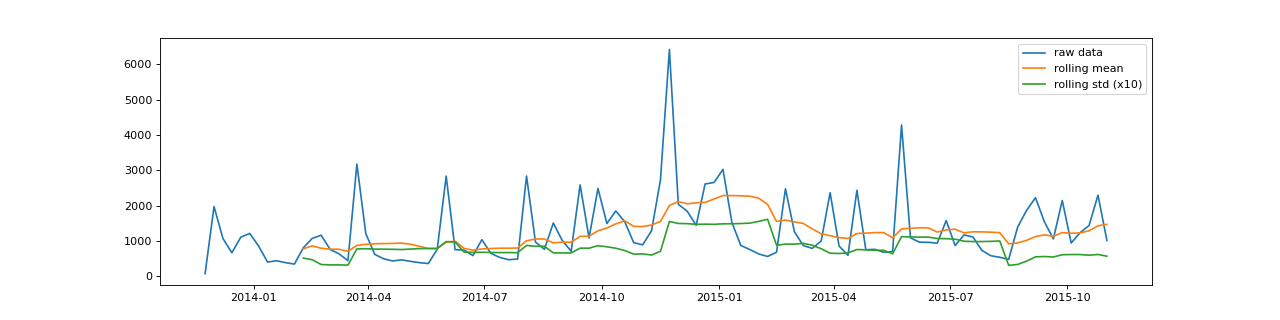

In [55]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

The ADF approach is essentially a statistical significance test that compares the p-value with the critical values and does hypothesis testing. Using this test, we can determine whether the processed data is stationary or not with different levels of confidence.

In [44]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [45]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -7.819
P-value = 0.000
Critical values :
	1%: -3.4968181663902103 - The data is  stationary with 99% confidence
	5%: -2.8906107514600103 - The data is  stationary with 95% confidence
	10%: -2.5822770483285953 - The data is  stationary with 90% confidence


Conclusion: Looking at both the visualization and ADF test, we can tell that our sample sales data is non-stationary. 

# Make Data Stationary

To proceed with our time series analysis, we need to stationarize the dataset. There are many approaches to stationarize data, but we’ll use de-trending, differencing, and then a combination of the two.

Transforms used for stationarizing data:
De-trending : We remove the underlying trend in the series. This can be done in several ways, depending on the nature of data :
- Indexed data: data measured in currencies are linked to a price index or related to inflation. Dividing the series by this index (ie deflating) element-wise is therefore the solution to de-trend the data.
- Non-indexed data: is it necessary to estimate if the trend is constant, linear or exponential. The first two cases are easy, for the last one it is necessary to estimate a growth rate (inflation or deflation) and apply the same method as for indexed data.
Differencing : Seasonal or cyclical patterns can be removed by substracting periodical values. If the data is 12-month seasonal, substracting the series with a 12-lag difference series will give a “flatter” series

<IPython.core.display.Javascript object>


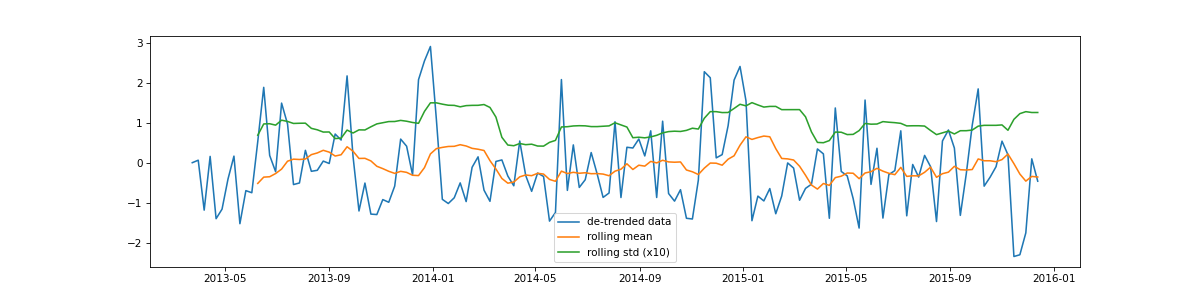

 > Is the de-trended data stationary ?
Test statistic = -5.878
P-value = 0.000
Critical values :
	1%: -3.4793722137854926 - The data is  stationary with 99% confidence
	5%: -2.8830370378332995 - The data is  stationary with 95% confidence
	10%: -2.578233635380623 - The data is  stationary with 90% confidence


In [167]:
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

The results show that the data is now stationary, indicated by the relative smoothness of the rolling mean and rolling standard deviation after running the ADF test again.

<IPython.core.display.Javascript object>


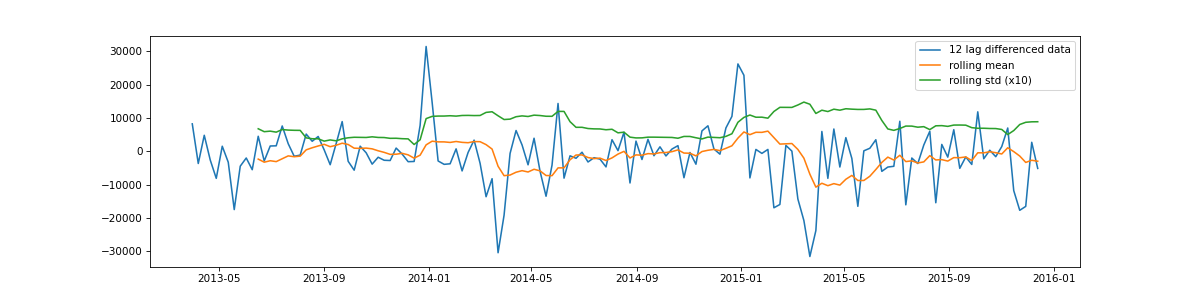

 > Is the 12 lag differenced data stationary ?
Test statistic = -3.364
P-value = 0.012
Critical values :
	1%: -3.482087964046026 - The data is not stationary with 99% confidence
	5%: -2.8842185101614626 - The data is  stationary with 95% confidence
	10%: -2.578864381347275 - The data is  stationary with 90% confidence


In [168]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

This method did not perform as well as the de-trending did, as indicated by the ADF test which is not stationary within 99 percent of the confidence interval.

<IPython.core.display.Javascript object>


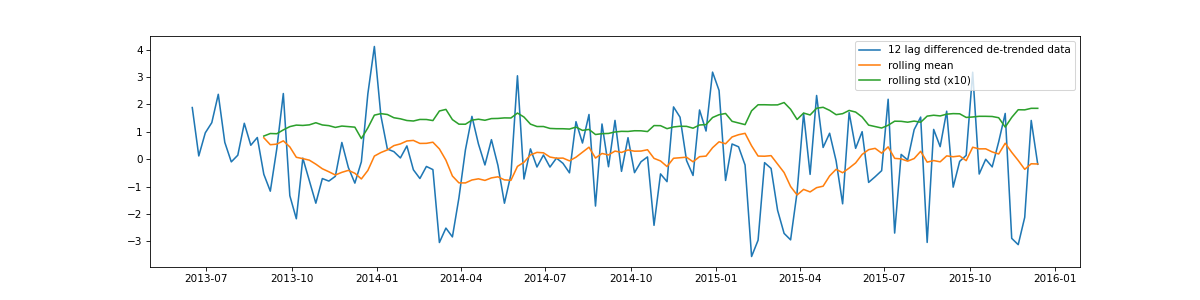

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -4.072
P-value = 0.001
Critical values :
	1%: -3.4870216863700767 - The data is  stationary with 99% confidence
	5%: -2.8863625166643136 - The data is  stationary with 95% confidence
	10%: -2.580009026141913 - The data is  stationary with 90% confidence


In [169]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

Using the combination of the two methods, we see from both the visualization and the ADF test that the data is now stationary. This is the transformation we will use moving forward with our analysis.

# Train Test Split

In [60]:
len(y)*0.7

71.39999999999999

In [49]:
y_to_train = y[:'2015-04-01'] # dataset to train
y_to_val = y['2015-04-01':] # last X months for test  
predict_date = len(y) - len(y[:'2015-04-01']) # the number of data points for the test set

# Different Time Series Prediction Models

Simple Exponential Smoothing (SES) for data without trend or seasonality

Holt’s Linear Trend Method for data with a trend but no seasonality


Holt-Winters’ Seasonal Method for data with trend and/or seasonality


SARIMA for data with trend and/or seasonality

## Simple Exponential Smoothing (SES)

It uses for series with no trend or seasonality --> learn from latest data, use ytd data to predict today

Formula: L(t) = alpha*Y(t) +(1-alpha)*L(t-1) ==> using weighted average, and this formula decay exponential towards past

alpha= smoothing constant , btw 0 and 1;
Y(t) = most recent data point ;
L(t) = level at time t;
L(t-1) = previous level at time t;

alpha = 1 ==> past value have no influence over forecasts (undersmoothing)
alpha = 0 ==> past values have equal influence on forecasts (oversmoothing)

Final Formula : F(t+1) = F(t) + alpha*Error(t)

<IPython.core.display.Javascript object>


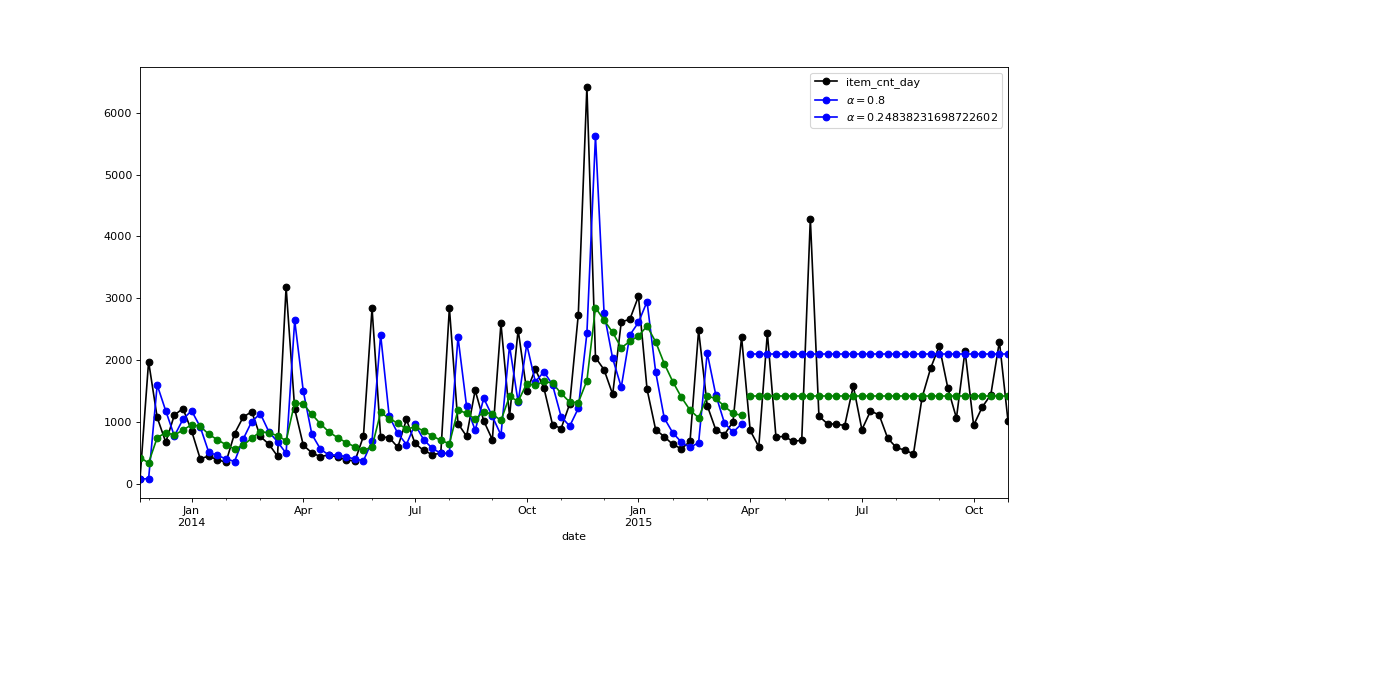

In [56]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 



def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

<IPython.core.display.Javascript object>


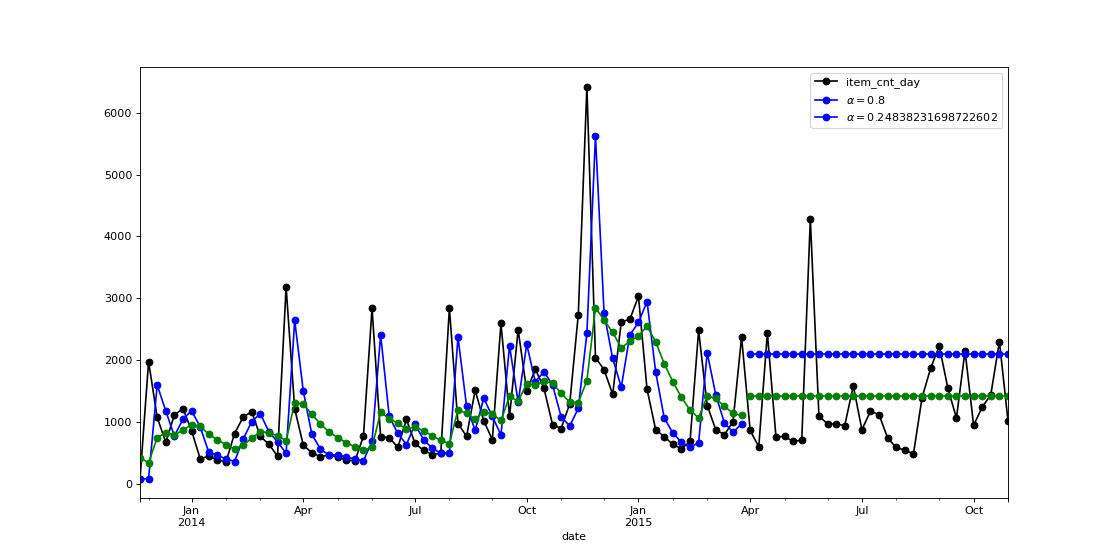

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 1124.29
The Root Mean Squared Error of our forecasts with auto optimization is 781.58


C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\MLee27\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [58]:
plt.figure()
ses(y, y_to_train,y_to_val,0.8,predict_date)